# 1 Marketing Analysis

# 1.1 Importando bibliotecas

In [2]:
import pandas as pd 
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns 

# 1.2 Leitura e otimização dos dados

In [3]:
visits = pd.read_csv('/datasets/visits_log_us.csv') 
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [4]:
print(visits.info())

visits = visits.rename(columns={
    'Device': 'device',
    'End Ts': 'end_ts',
    'Source Id': 'source_id',
    'Start Ts': 'start_ts',  
    'Uid': 'uid'
})

print(visits.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None
    device               end_ts  source_id             start_ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   996969

In [5]:
print(orders.info())
print()

orders = orders.rename(columns={
    'Buy Ts': 'buy_ts',        
    'Revenue': 'revenue',  
    'Uid': 'uid', 
    'Device': 'device'
})

print(orders.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

                buy_ts  revenue                   uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


In [6]:
print(costs.info())
print()
print(costs.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08


In [7]:
visits['start_ts']= pd.to_datetime(visits['start_ts']) # convertendo para timestamp
visits['end_ts']= pd.to_datetime(visits['end_ts']) # convertendo para timestamp

print(visits)

         device              end_ts  source_id            start_ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
...         ...                 ...        ...                 ...   
359395  desktop 2017-07-29 19:07:19          2 2017-07-29 19:07:00   
359396    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
359397  desktop 2018-03-03 10:12:19          4 2018-03-03 10:12:00   
359398  desktop 2017-11-02 10:12:19          5 2017-11-02 10:12:00   
359399    touch 2017-09-10 13:13:19          2 2017-09-10 13:13:00   

                         uid  
0       16879256277535980062  
1         104060357244891740  
2        7459035603376831527  
3       16174680259334210214  
4   

In [8]:
duplicated  = visits.duplicated()
print(duplicated.sum())
print(visits.isnull().sum())

0
device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64


# 1.3 Produto

Usuários diários:
           date  daily_users
0    2017-06-01          605
1    2017-06-02          608
2    2017-06-03          445
3    2017-06-04          476
4    2017-06-05          820
..          ...          ...
359  2018-05-27          620
360  2018-05-28         1039
361  2018-05-29          948
362  2018-05-30         1289
363  2018-05-31         1997

[364 rows x 2 columns]

Usuários semanais:
                     week  weekly_users
0   2017-05-29/2017-06-04          2021
1   2017-06-05/2017-06-11          4129
2   2017-06-12/2017-06-18          2812
3   2017-06-19/2017-06-25          2878
4   2017-06-26/2017-07-02          3064
5   2017-07-03/2017-07-09          3294
6   2017-07-10/2017-07-16          4355
7   2017-07-17/2017-07-23          3841
8   2017-07-24/2017-07-30          2655
9   2017-07-31/2017-08-06          2364
10  2017-08-07/2017-08-13          2444
11  2017-08-14/2017-08-20          2746
12  2017-08-21/2017-08-27          3116
13  2017-08-28/2017-09-03     

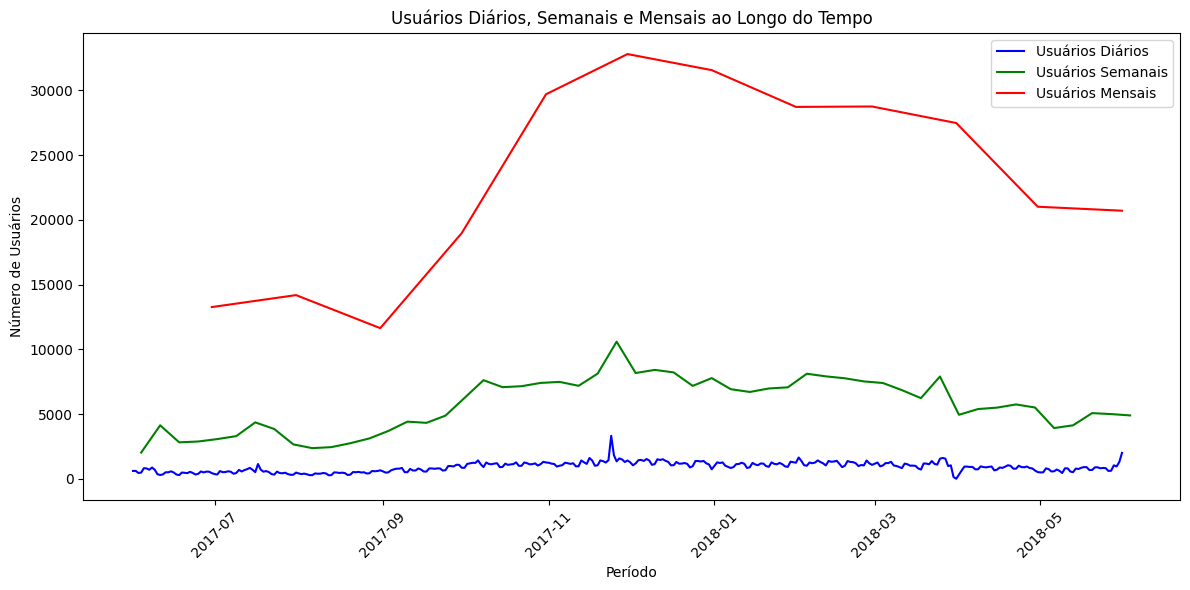

In [9]:
visits['date'] = visits['start_ts'].dt.date 
daily_users = visits.groupby('date')['uid'].nunique().reset_index(name='daily_users')

visits['week'] = visits['start_ts'].dt.to_period('W') 
weekly_users = visits.groupby('week')['uid'].nunique().reset_index(name='weekly_users')

visits['month'] = visits['start_ts'].dt.to_period('M')  
monthly_users = visits.groupby('month')['uid'].nunique().reset_index(name='monthly_users')

print("Usuários diários:")
print(daily_users)

print("\nUsuários semanais:")
print(weekly_users)

print("\nUsuários mensais:")
print(monthly_users)

plt.figure(figsize=(12, 6))
plt.plot(daily_users['date'], daily_users['daily_users'], label='Usuários Diários', color='blue')
plt.plot(weekly_users['week'], weekly_users['weekly_users'], label='Usuários Semanais', color='green')
plt.plot(monthly_users['month'], monthly_users['monthly_users'], label='Usuários Mensais', color='red')

plt.xlabel('Período')
plt.ylabel('Número de Usuários')
plt.title('Usuários Diários, Semanais e Mensais ao Longo do Tempo')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

Sessões por dia:
           date  sessions
0    2017-06-01       664
1    2017-06-02       658
2    2017-06-03       477
3    2017-06-04       510
4    2017-06-05       893
..          ...       ...
359  2018-05-27       672
360  2018-05-28      1156
361  2018-05-29      1035
362  2018-05-30      1410
363  2018-05-31      2256

[364 rows x 2 columns]


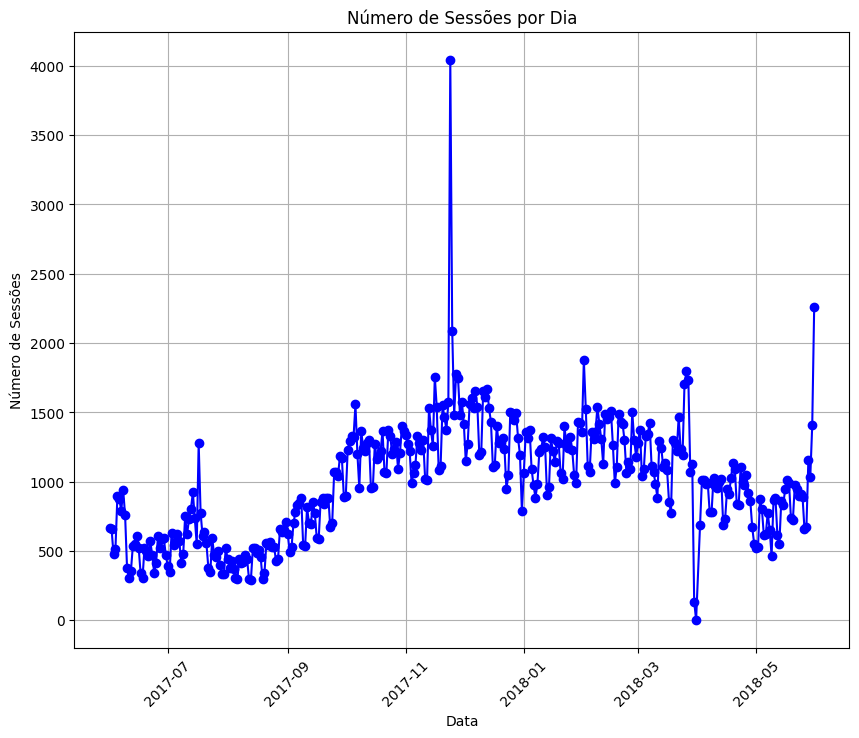

In [10]:
visits['start_ts'] = pd.to_datetime(visits['start_ts']) # sessions per day 

visits['date'] = visits['start_ts'].dt.date

sessions_per_day = visits.groupby('date').size().reset_index(name='sessions')

print("Sessões por dia:")
print(sessions_per_day)

plt.figure(figsize=(10, 8))
plt.plot(sessions_per_day['date'], sessions_per_day['sessions'], marker='o', linestyle='-', color='blue')

plt.xlabel('Data')
plt.ylabel('Número de Sessões')
plt.title('Número de Sessões por Dia')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

         device              end_ts  source_id            start_ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
...         ...                 ...        ...                 ...   
359395  desktop 2017-07-29 19:07:19          2 2017-07-29 19:07:00   
359396    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
359397  desktop 2018-03-03 10:12:19          4 2018-03-03 10:12:00   
359398  desktop 2017-11-02 10:12:19          5 2017-11-02 10:12:00   
359399    touch 2017-09-10 13:13:19          2 2017-09-10 13:13:00   

                         uid        date                   week    month  \
0       16879256277535980062  2017-12-20  2017-12-18/2017-12-24  2017-12   
1      

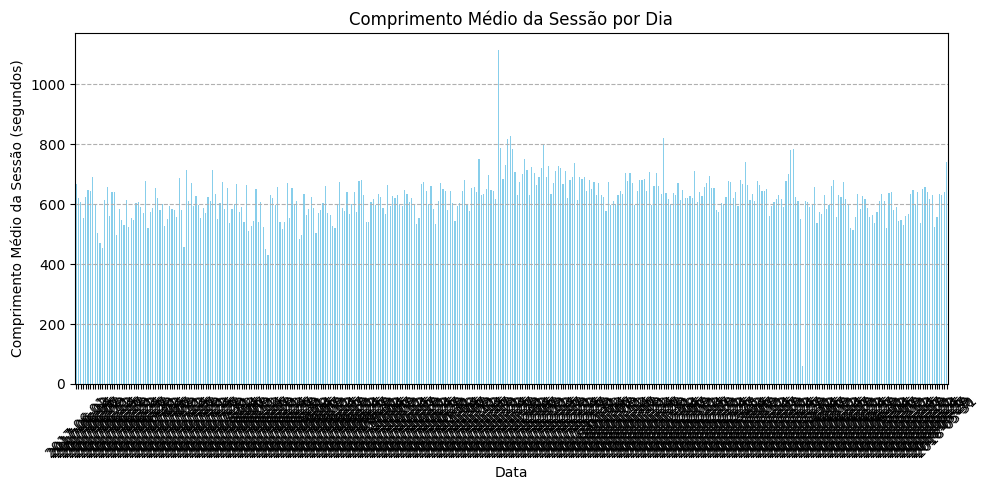

In [11]:
visits['session length'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() # comprimento da sessão

avg_session_length = visits.groupby(visits['start_ts'].dt.date)['session length'].mean() # comprimento médio

print(visits)

plt.figure(figsize=(10, 5))
avg_session_length.plot(kind='bar', color='skyblue')
plt.title('Comprimento Médio da Sessão por Dia')
plt.xlabel('Data')
plt.ylabel('Comprimento Médio da Sessão (segundos)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()


 

         device              end_ts  source_id            start_ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
...         ...                 ...        ...                 ...   
359395  desktop 2017-07-29 19:07:19          2 2017-07-29 19:07:00   
359396    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
359397  desktop 2018-03-03 10:12:19          4 2018-03-03 10:12:00   
359398  desktop 2017-11-02 10:12:19          5 2017-11-02 10:12:00   
359399    touch 2017-09-10 13:13:19          2 2017-09-10 13:13:00   

                         uid        date                   week    month  \
0       16879256277535980062  2017-12-20  2017-12-18/2017-12-24  2017-12   
1      

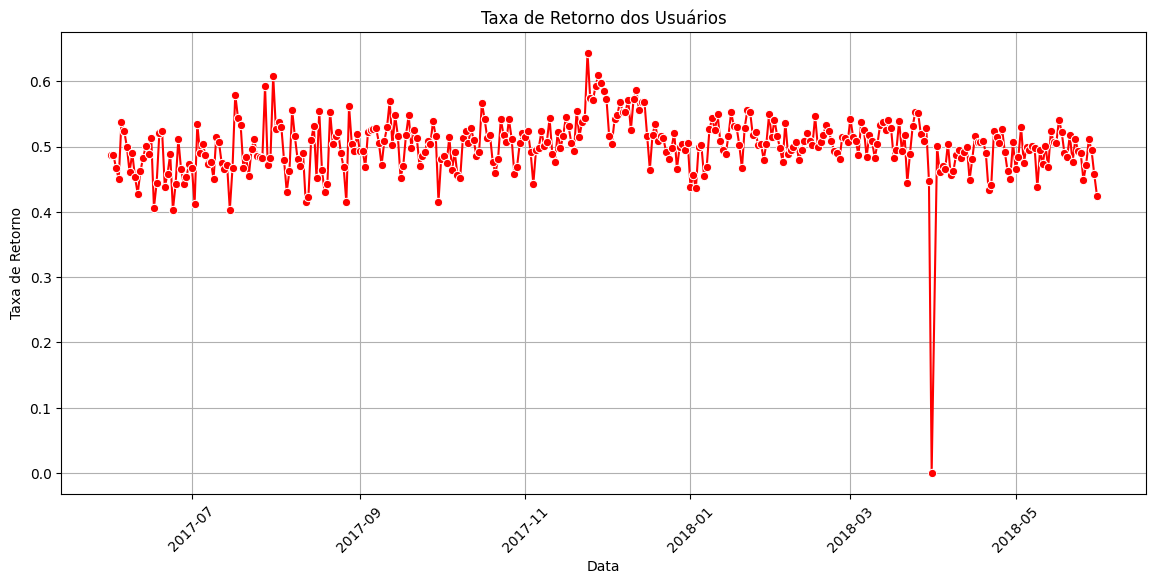

In [12]:
# Calculo de frequência de retorno dos usuários
visits['return user'] = visits['uid'].duplicated(keep=False)

return_rate = visits.groupby(visits['start_ts'].dt.date)['return user'].mean()

print(visits)
print(return_rate)

plt.figure(figsize=(14, 6))
sns.lineplot(x=return_rate.index, y=return_rate.values, marker='o', color='red')
plt.title('Taxa de Retorno dos Usuários')
plt.xlabel('Data')
plt.ylabel('Taxa de Retorno')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 1.4 Vendas

In [13]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

first_visits = visits.groupby('uid')['start_ts'].min().reset_index()
first_visits.columns = ['uid', 'first_visit']

first_orders = orders.groupby('uid')['buy_ts'].min().reset_index()
first_orders.columns = ['uid', 'first_order']

conversion_data = pd.merge(first_visits, first_orders, on='uid', how='left')

conversion_data['conversion_timed'] = (conversion_data['first_order'] - conversion_data['first_visit']).dt.days

conversion_data['conversion_category'] = conversion_data['conversion_timed'].apply(
    lambda x: f'{x}d' if pd.notnull(x) else 'No Purchase')

print(conversion_data)

visits_with_source = visits[['uid', 'source_id', 'start_ts']].drop_duplicates(subset=['uid'])
conversion_data_with_source = pd.merge(conversion_data, visits_with_source, on='uid', how='left')

conversion_by_source = conversion_data_with_source.groupby('source_id')['conversion_category'].value_counts(normalize=True)
print(conversion_by_source)

                         uid         first_visit         first_order  \
0             11863502262781 2018-03-01 17:27:00                 NaT   
1             49537067089222 2018-02-06 15:55:00                 NaT   
2            297729379853735 2017-06-07 18:47:00                 NaT   
3            313578113262317 2017-09-18 22:49:00 2018-01-03 21:51:00   
4            325320750514679 2017-09-30 14:29:00                 NaT   
...                      ...                 ...                 ...   
228164  18446403737806311543 2017-11-30 03:36:00                 NaT   
228165  18446424184725333426 2017-12-06 20:32:00                 NaT   
228166  18446556406699109058 2018-01-01 16:29:00                 NaT   
228167  18446621818809592527 2017-12-27 13:27:00                 NaT   
228168  18446676030785672386 2017-10-04 16:01:00                 NaT   

        conversion_timed conversion_category  
0                    NaN         No Purchase  
1                    NaN         No Purch

In [14]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts']) # Pedidos feitos em maio

start_date = '2018-05-01'
end_date = '2018-05-31'

filtered_orders = orders[(orders['buy_ts'] >= start_date) & (orders['buy_ts'] <= end_date)]

orders_per_user = filtered_orders.groupby('uid').size().reset_index(name='order_count')

print(orders_per_user)

total_orders = filtered_orders.shape[0]
print(f'Total de pedidos durante o período: {total_orders}')

                       uid  order_count
0        17297570524299249            1
1        22585383497813710            1
2        33589118145270544            1
3        40098613383987871            1
4        41987055044463519            1
...                    ...          ...
3006  18413403606138337462            1
3007  18417227789295707563            1
3008  18418973552381796231            1
3009  18419772037216346332            1
3010  18428860277441438399            1

[3011 rows x 2 columns]
Total de pedidos durante o período: 3736


In [15]:
average_order_value = orders['revenue'].mean() # volume médio de compra

print(f'Volume médio de uma compra: {average_order_value}')

Volume médio de uma compra: 4.999646930477041


# 1.5 Cálculo do LTV

In [16]:
first_orders = orders.groupby('uid')['buy_ts'].min().reset_index()
first_orders.columns = ['uid', 'first_order_date']

first_orders['first_order_month'] = first_orders['first_order_date'].dt.to_period('M')

cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})  
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']

df_orders_ = pd.merge(orders, first_orders[['uid', 'first_order_month']], on='uid')

df_orders_['order_month'] = df_orders_['buy_ts'].dt.to_period('M')

cohorts = (
    df_orders_.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'}) 
    .reset_index()
)

report = pd.merge(cohorts, cohort_sizes, on='first_order_month')

margin_rate = 0.4

report['ltv'] = (report['revenue'] * margin_rate) / report['n_buyers']

ltv_pivot = report.pivot_table(index='first_order_month', columns='order_month', values='ltv', aggfunc='sum')

# Exibindo a tabela de LTV por coorte
print(ltv_pivot)

# Exibindo a receita total e o LTV médio para cada coorte
ltv_avg = report.groupby('first_order_month')['ltv'].mean().reset_index()
print("\nLTV médio por coorte:")
print(ltv_avg)

order_month         2017-06   2017-07   2017-08   2017-09   2017-10   2017-11  \
first_order_month                                                               
2017-06            1.889766  0.194131  0.175055  0.381869  0.409012  0.294201   
2017-07                 NaN  2.404087  0.134084  0.249412  0.143590  0.070717   
2017-08                 NaN       NaN  2.110607  0.188797  0.183393  0.156511   
2017-09                 NaN       NaN       NaN  2.257812  0.447034  0.208372   
2017-10                 NaN       NaN       NaN       NaN  2.001493  0.214305   
2017-11                 NaN       NaN       NaN       NaN       NaN  2.061873   
2017-12                 NaN       NaN       NaN       NaN       NaN       NaN   
2018-01                 NaN       NaN       NaN       NaN       NaN       NaN   
2018-02                 NaN       NaN       NaN       NaN       NaN       NaN   
2018-03                 NaN       NaN       NaN       NaN       NaN       NaN   
2018-04                 NaN 

# 1.6 Marketing 

In [17]:
costs['dt'] = pd.to_datetime(costs['dt']) # Dinheiro gasto 

total_costs = costs['costs'].sum()

costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()

costs_by_day = costs.groupby(costs['dt'].dt.date)['costs'].sum().reset_index()

costs_by_month = costs.groupby(costs['dt'].dt.to_period('M'))['costs'].sum().reset_index()

print(f"Total de despesas: {total_costs:.2f}\n")

print("Despesas por origem de anúncio:")
print(costs_by_source)

print("\nDespesas diárias:")
print(costs_by_day)

print("\nDespesas mensais:")
print(costs_by_month)

Total de despesas: 329131.62

Despesas por origem de anúncio:
   source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49

Despesas diárias:
             dt    costs
0    2017-06-01   735.26
1    2017-06-02   721.19
2    2017-06-03   450.85
3    2017-06-04   761.16
4    2017-06-05   821.44
..          ...      ...
359  2018-05-27   532.87
360  2018-05-28   619.44
361  2018-05-29   784.79
362  2018-05-30  1183.00
363  2018-05-31  2153.70

[364 rows x 2 columns]

Despesas mensais:
         dt     costs
0   2017-06  18015.00
1   2017-07  18240.59
2   2017-08  14790.54
3   2017-09  24368.91
4   2017-10  36322.88
5   2017-11  37907.88
6   2017-12  38315.35
7   2018-01  33518.52
8   2018-02  32723.03
9   2018-03  30415.27
10  2018-04  22289.38
11  2018-05  22224.27


In [18]:
costs['dt'] = pd.to_datetime(costs['dt']) # CAC 
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()

merged_data = pd.merge(visits[['uid', 'source_id']], orders[['uid']], on='uid', how='inner')

new_customers_by_source = merged_data.groupby('source_id')['uid'].nunique().reset_index(name='new_customers')

cac_data = pd.merge(costs_by_source, new_customers_by_source, left_on='source_id', right_on='source_id')

cac_data['CAC'] = cac_data['costs'] / cac_data['new_customers']

print(cac_data[['source_id', 'costs', 'new_customers', 'CAC']])

   source_id      costs  new_customers        CAC
0          1   20833.27           7138   2.918642
1          2   42806.04           7305   5.859828
2          3  141321.63          13846  10.206676
3          4   61073.60          14253   4.284965
4          5   51757.10          10156   5.096209
5          9    5517.49           2793   1.975471
6         10    5822.49           1773   3.283976


In [19]:
orders

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247



Mesclando 'first_orders' com 'first_visits' para criar 'buyers'...

Iniciando o cálculo do ROMI por coorte...

Calculando ROMI para a fonte 1...
Tamanho da coorte calculado:
   source_id first_order_month  n_buyers
0          1           2017-06       190
1          1           2017-07       160
2          1           2017-08       113
3          1           2017-09       227
4          1           2017-10       340
Receita acumulada por coorte calculada:
   source_id first_order_month order_month       gp
0          1           2017-06     2017-06  1378.70
1          1           2017-06     2017-07   414.98
2          1           2017-06     2017-08   419.43
3          1           2017-06     2017-09   714.24
4          1           2017-06     2017-10   811.20
Relatório de ROMI (antes de cálculos adicionais):
   source_id first_order_month  n_buyers order_month       gp
0          1           2017-06       190     2017-06  1378.70
1          1           2017-06       190     2017-07 

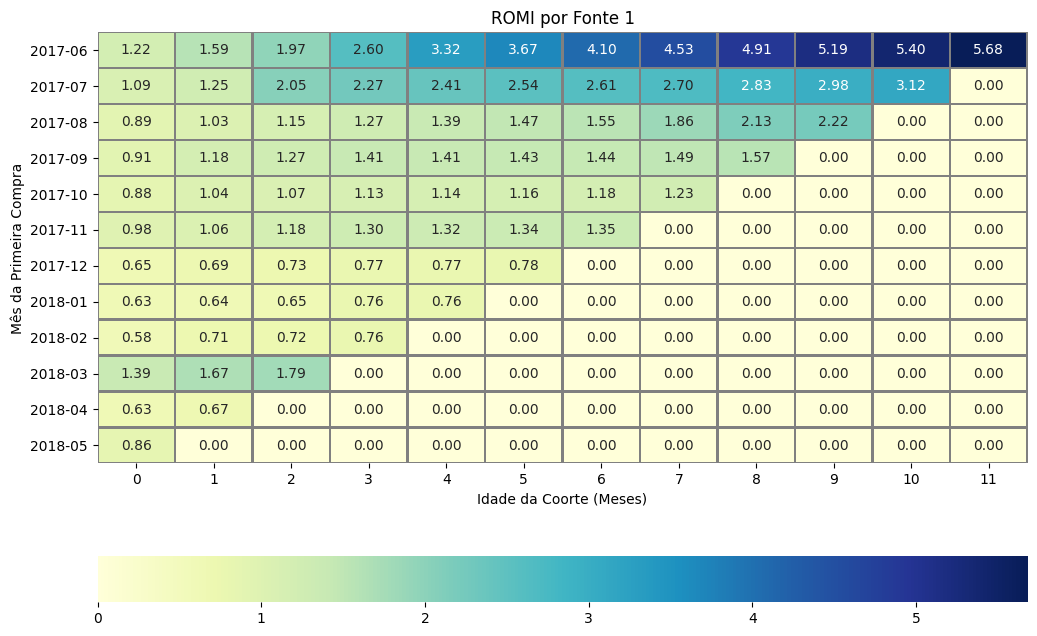

ROMI calculado e visualizado para a fonte 1.


Calculando ROMI para a fonte 2...
Tamanho da coorte calculado:
   source_id first_order_month  n_buyers
0          2           2017-06       235
1          2           2017-07       208
2          2           2017-08       123
3          2           2017-09       221
4          2           2017-10       396
Receita acumulada por coorte calculada:
   source_id first_order_month order_month       gp
0          2           2017-06     2017-06  1043.68
1          2           2017-06     2017-07   115.54
2          2           2017-06     2017-08    63.90
3          2           2017-06     2017-09   452.35
4          2           2017-06     2017-10   391.70
Relatório de ROMI (antes de cálculos adicionais):
   source_id first_order_month  n_buyers order_month       gp
0          2           2017-06       235     2017-06  1043.68
1          2           2017-06       235     2017-07   115.54
2          2           2017-06       235     2017-08    

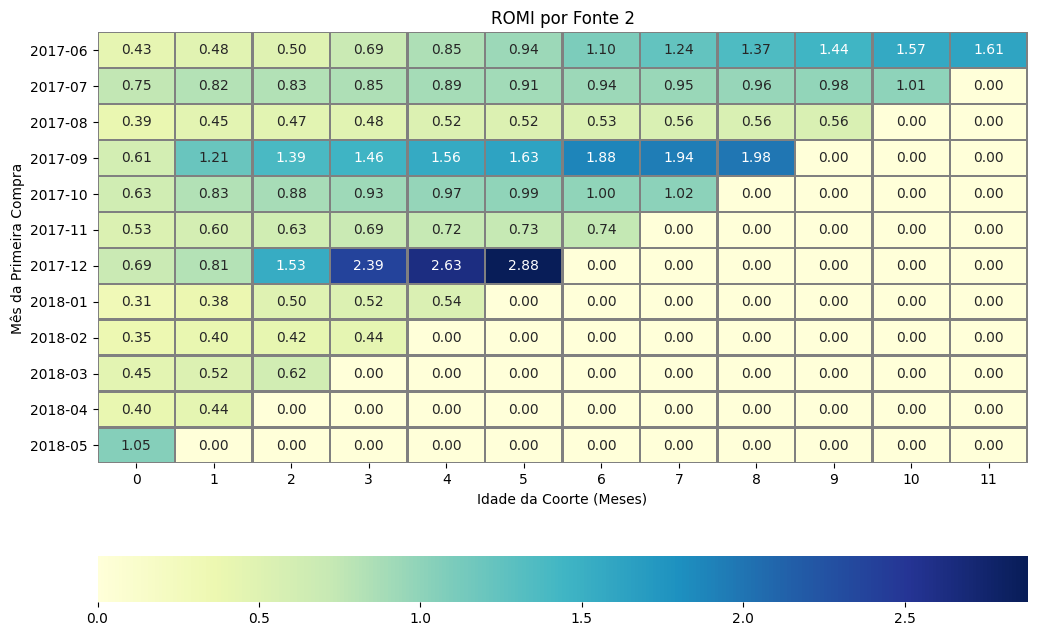

ROMI calculado e visualizado para a fonte 2.


Calculando ROMI para a fonte 3...
Tamanho da coorte calculado:
   source_id first_order_month  n_buyers
0          3           2017-06       638
1          3           2017-07       512
2          3           2017-08       337
3          3           2017-09       781
4          3           2017-10      1152
Receita acumulada por coorte calculada:
   source_id first_order_month order_month       gp
0          3           2017-06     2017-06  2804.34
1          3           2017-06     2017-07    71.97
2          3           2017-06     2017-08   118.93
3          3           2017-06     2017-09   198.55
4          3           2017-06     2017-10   118.48
Relatório de ROMI (antes de cálculos adicionais):
   source_id first_order_month  n_buyers order_month       gp
0          3           2017-06       638     2017-06  2804.34
1          3           2017-06       638     2017-07    71.97
2          3           2017-06       638     2017-08   1

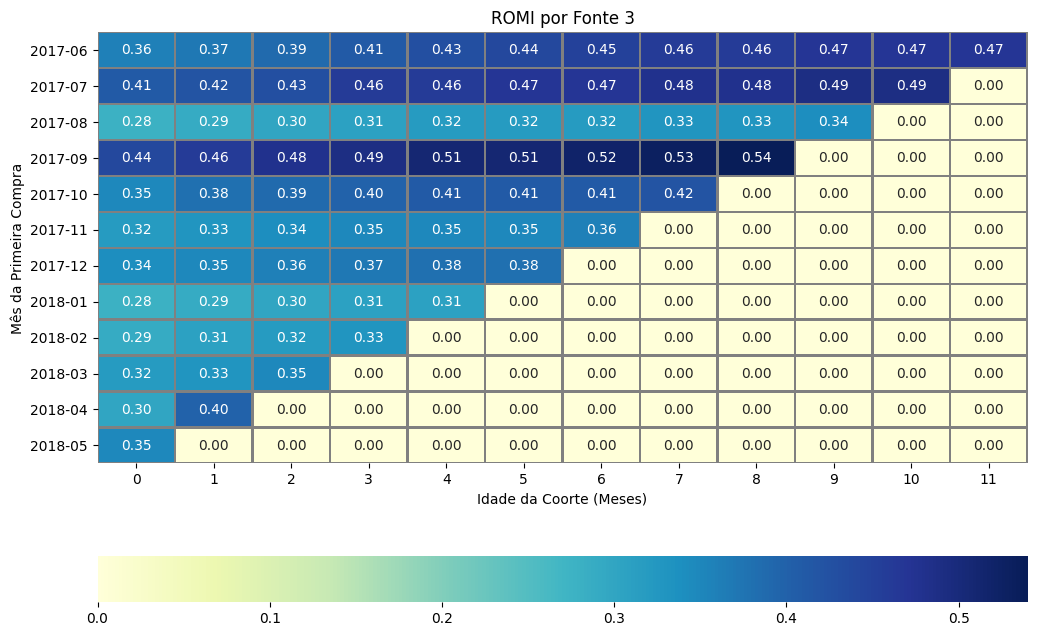

ROMI calculado e visualizado para a fonte 3.


Calculando ROMI para a fonte 4...
Tamanho da coorte calculado:
   source_id first_order_month  n_buyers
0          4           2017-06       413
1          4           2017-07       517
2          4           2017-08       338
3          4           2017-09       590
4          4           2017-10      1172
Receita acumulada por coorte calculada:
   source_id first_order_month order_month       gp
0          4           2017-06     2017-06  1959.84
1          4           2017-06     2017-07    16.66
2          4           2017-06     2017-08    70.57
3          4           2017-06     2017-09   189.74
4          4           2017-06     2017-10   474.30
Relatório de ROMI (antes de cálculos adicionais):
   source_id first_order_month  n_buyers order_month       gp
0          4           2017-06       413     2017-06  1959.84
1          4           2017-06       413     2017-07    16.66
2          4           2017-06       413     2017-08    

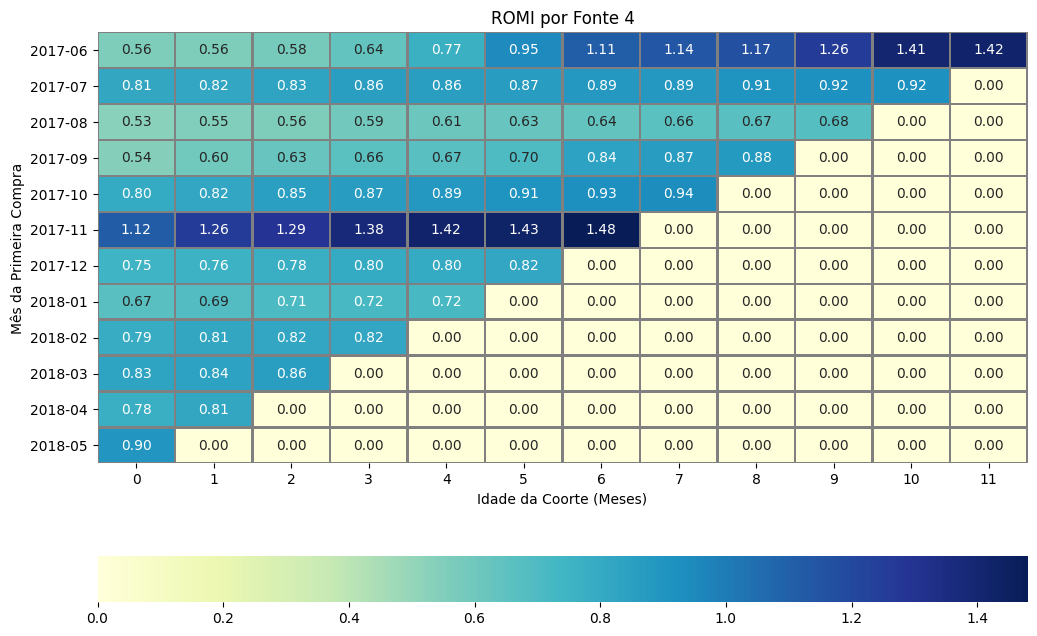

ROMI calculado e visualizado para a fonte 4.


Calculando ROMI para a fonte 5...
Tamanho da coorte calculado:
   source_id first_order_month  n_buyers
0          5           2017-06       384
1          5           2017-07       423
2          5           2017-08       360
3          5           2017-09       589
4          5           2017-10       945
Receita acumulada por coorte calculada:
   source_id first_order_month order_month       gp
0          5           2017-06     2017-06  1898.89
1          5           2017-06     2017-07   346.73
2          5           2017-06     2017-08   172.53
3          5           2017-06     2017-09   335.13
4          5           2017-06     2017-10   254.71
Relatório de ROMI (antes de cálculos adicionais):
   source_id first_order_month  n_buyers order_month       gp
0          5           2017-06       384     2017-06  1898.89
1          5           2017-06       384     2017-07   346.73
2          5           2017-06       384     2017-08   1

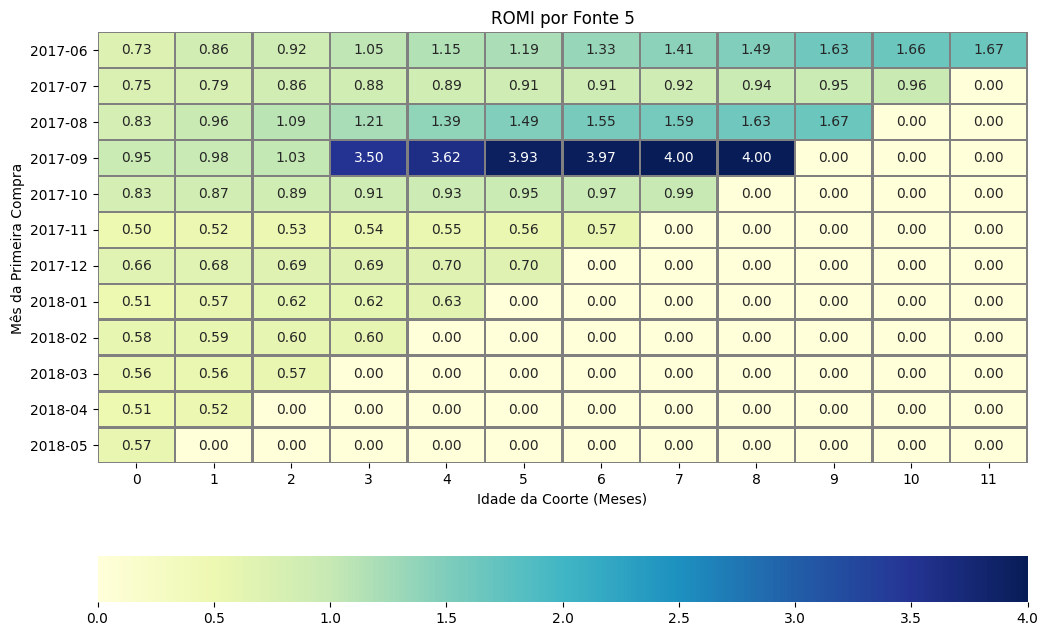

ROMI calculado e visualizado para a fonte 5.


Calculando ROMI para a fonte 9...
Tamanho da coorte calculado:
   source_id first_order_month  n_buyers
0          9           2017-06        68
1          9           2017-07        52
2          9           2017-08        61
3          9           2017-09        87
4          9           2017-10       126
Receita acumulada por coorte calculada:
   source_id first_order_month order_month      gp
0          9           2017-06     2017-06  242.69
1          9           2017-06     2017-07    4.88
2          9           2017-06     2017-08   39.98
3          9           2017-06     2017-09   41.29
4          9           2017-06     2017-10   18.19
Relatório de ROMI (antes de cálculos adicionais):
   source_id first_order_month  n_buyers order_month      gp
0          9           2017-06        68     2017-06  242.69
1          9           2017-06        68     2017-07    4.88
2          9           2017-06        68     2017-08   39.98
3   

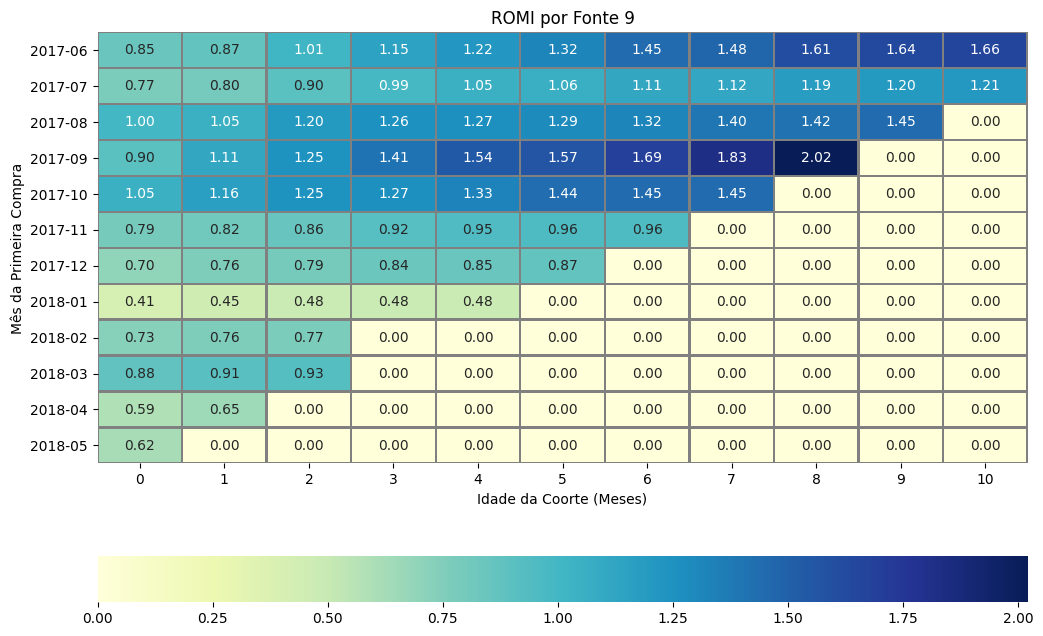

ROMI calculado e visualizado para a fonte 9.


Calculando ROMI para a fonte 10...
Tamanho da coorte calculado:
   source_id first_order_month  n_buyers
0         10           2017-06        95
1         10           2017-07        51
2         10           2017-08        37
3         10           2017-09        86
4         10           2017-10       209
Receita acumulada por coorte calculada:
   source_id first_order_month order_month      gp
0         10           2017-06     2017-06  229.35
1         10           2017-06     2017-07   11.06
2         10           2017-06     2018-02    0.85
3         10           2017-07     2017-07  176.53
4         10           2017-07     2017-08    1.59
Relatório de ROMI (antes de cálculos adicionais):
   source_id first_order_month  n_buyers order_month      gp
0         10           2017-06        95     2017-06  229.35
1         10           2017-06        95     2017-07   11.06
2         10           2017-06        95     2018-02    0.85
3  

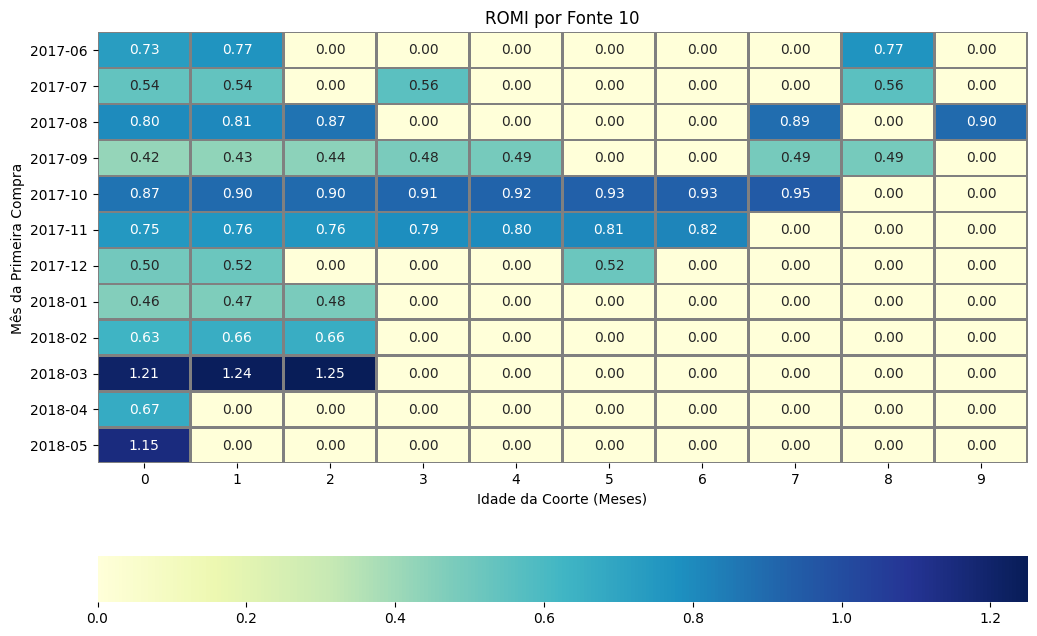

ROMI calculado e visualizado para a fonte 10.



In [20]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], errors='coerce') # Cálculo do ROMI
orders['order_month'] = orders['buy_ts'].dt.to_period('M')

# Identificar a primeira compra de cada usuário
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders['first_order_month'] = first_orders['buy_ts'].dt.to_period('M')

# 1.2. Processar a tabela Visits
visits['start_ts'] = pd.to_datetime(visits['start_ts'], errors='coerce')  
if visits['start_ts'].isnull().any():
    visits['month'] = visits['start_ts'].dt.to_period('M')  

# Identificar a primeira visita de cada usuário
first_visits = visits.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visits = pd.merge(first_visits, visits, on=['uid', 'start_ts'], how='left')  # Obter 'source_id'
first_visits['first_visit_month'] = first_visits['start_ts'].dt.to_period('M')

# 1.3. Mesclar informações de primeira compra e primeira visita
print("\nMesclando 'first_orders' com 'first_visits' para criar 'buyers'...")
buyers = pd.merge(first_orders, first_visits[['uid', 'source_id', 'first_visit_month']], on='uid', how='left')

# 1.4. Agrupar as receitas por usuário e mês do pedido
#print("\nAgrupando as receitas por usuário e mês do pedido...")
month_revenue = orders.groupby(['uid', 'order_month']).agg({'revenue': 'sum'}).reset_index()
#print("Tabela 'month_revenue' criada com sucesso.")
#print(month_revenue.head())

# 1.5. Mesclar 'buyers' com 'month_revenue'
#print("\nMesclando 'buyers' com 'month_revenue'...")
# Aqui, precisamos mesclar com 'order_month' para garantir que a receita seja correta
buyers = pd.merge(buyers, month_revenue, on='uid', how='left')
#print("Tabela 'buyers' após a mescla com 'month_revenue':")
#print(buyers.head())

# 1.6. Processar a tabela Costs
#print("\nProcessando a tabela 'costs'...")
costs['dt'] = pd.to_datetime(costs['dt'], errors='coerce')  # Converter para datetime
if costs['dt'].isnull().any():
    #print("Aviso: Algumas datas em 'dt' não puderam ser convertidas e foram definidas como NaT.")

    costs['costs_month'] = costs['dt'].dt.to_period('M')  # Extrair o mês dos custos
    monthly_costs = costs.groupby(['source_id', 'costs_month']).agg({'costs': 'sum'}).reset_index()
#print("Tabela 'monthly_costs' criada com sucesso.")
#print(monthly_costs.head())
costs['costs_month'] = costs['dt'].dt.to_period('M')  # Extrair o mês dos custos
monthly_costs = costs.groupby(['source_id', 'costs_month']).agg({'costs': 'sum'}).reset_index()
# 2. Cálculo do ROMI por Coorte

print("\nIniciando o cálculo do ROMI por coorte...")

# 2.1. Loop por cada fonte de tráfego, exceto a fonte 7
for source, df in buyers.groupby('source_id'):
    if source != 7:
        print(f"\nCalculando ROMI para a fonte {source}...")
        
        # 2.2. Calcular o tamanho da coorte (número de compradores únicos) por fonte e mês do primeiro pedido
        cohort_sizes_t = (
            df.groupby(['source_id', 'first_order_month'])
            .agg({'uid': 'nunique'})
            .reset_index()
        )
        cohort_sizes_t.columns = ['source_id', 'first_order_month', 'n_buyers']
        print("Tamanho da coorte calculado:")
        print(cohort_sizes_t.head())
        
        # 2.3. Calcular a receita acumulada por coorte, fonte e mês do pedido
        cohorts_revenue_t = (
            df.groupby(['source_id', 'first_order_month', 'order_month'])
            .agg({'revenue': 'sum'})
            .reset_index()
        )
        cohorts_revenue_t.columns = ['source_id', 'first_order_month', 'order_month', 'gp']
        print("Receita acumulada por coorte calculada:")
        print(cohorts_revenue_t.head())
        
        # 2.4. Juntar os tamanhos da coorte e as receitas acumuladas
        report_romi = pd.merge(cohort_sizes_t, cohorts_revenue_t, on=['source_id', 'first_order_month'], how='left')
        print("Relatório de ROMI (antes de cálculos adicionais):")
        print(report_romi.head())
        
        # 2.5. Calcular a idade da coorte em meses
        # A diferença entre 'order_month' e 'first_order_month' já é em períodos mensais, então 'x.n' retorna a diferença em meses
        report_romi['age'] = (report_romi['order_month'] - report_romi['first_order_month']).apply(lambda x: x.n)
        report_romi['age'] = report_romi['age'].astype(int)
        print("Idade da coorte calculada:")
        print(report_romi[['source_id', 'first_order_month', 'order_month', 'age']].head())
        
        # 2.6. Calcular o LTV (Lifetime Value) por coorte
        report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']
        print("LTV calculado:")
        print(report_romi[['gp', 'n_buyers', 'ltv']].head())
        
        # 2.7. Juntar os custos mensais por fonte de tráfego e mês do primeiro pedido
        report_romi = pd.merge(
            report_romi,
            monthly_costs,
            left_on=['source_id', 'first_order_month'],
            right_on=['source_id', 'costs_month'],
            how='left'
        )
        print("Custos mesclados:")
        print(report_romi.head())
        
        # 2.8. Remover a coluna de mês de custos após a junção
        report_romi = report_romi.drop(['costs_month'], axis=1)
        print("Coluna 'costs_month' removida.")
        
        # 2.9. Preencher NaNs nos custos com 0
        report_romi['costs'] = report_romi['costs'].fillna(0)
        print("NaNs nos custos preenchidos com 0.")
        
        # 2.10. Calcular o CAC (Customer Acquisition Cost) por coorte
        report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
        print("CAC calculado:")
        print(report_romi[['costs', 'n_buyers', 'cac']].head())
        
        # 2.11. Calcular o ROMI (Return on Marketing Investment) por coorte
        # Evita divisão por zero substituindo 'cac' igual a 0 por NaN
        report_romi['romi'] = report_romi['ltv'] / report_romi['cac'].replace(0, np.nan)
        print("ROMI calculado:")
        print(report_romi[['ltv', 'cac', 'romi']].head())
        
        # 2.12. Calcular o ROMI acumulado por idade da coorte
        romi = report_romi.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1)
        romi = romi.round(2).fillna(0)  # Preencher NaNs com 0 para evitar erros no heatmap
        print("Tabela de ROMI acumulado:")
        print(romi.head())
        
        # 2.13. Ajustar o tipo do índice para string e criar um mapa de calor com seaborn
        romi.index = romi.index.astype(str)
        plt.figure(figsize=(12, 8))
        sns.heatmap(
            romi,
            annot=True,
            fmt='.2f',
            linewidths=1,
            linecolor='grey',
            cbar_kws={'orientation': 'horizontal'},
            cmap='YlGnBu'
        )
        plt.title(f'ROMI por Fonte {source}')
        plt.xlabel('Idade da Coorte (Meses)')
        plt.ylabel('Mês da Primeira Compra')
        plt.show()
        
        print(f"ROMI calculado e visualizado para a fonte {source}.\n")


Mesclando 'first_orders' com 'first_visits' para criar 'buyers'...

Iniciando o cálculo do ROMI por coorte...

Calculando ROMI para a fonte 1...
Tamanho da coorte calculado:
   source_id first_order_month  n_buyers
0          1           2017-06       190
1          1           2017-07       160
2          1           2017-08       113
3          1           2017-09       227
4          1           2017-10       340
Receita acumulada por coorte calculada:
   source_id first_order_month order_month       gp
0          1           2017-06     2017-06  1378.70
1          1           2017-06     2017-07   414.98
2          1           2017-06     2017-08   419.43
3          1           2017-06     2017-09   714.24
4          1           2017-06     2017-10   811.20
Relatório de ROMI (antes de cálculos adicionais):
   source_id first_order_month  n_buyers order_month       gp
0          1           2017-06       190     2017-06  1378.70
1          1           2017-06       190     2017-07 

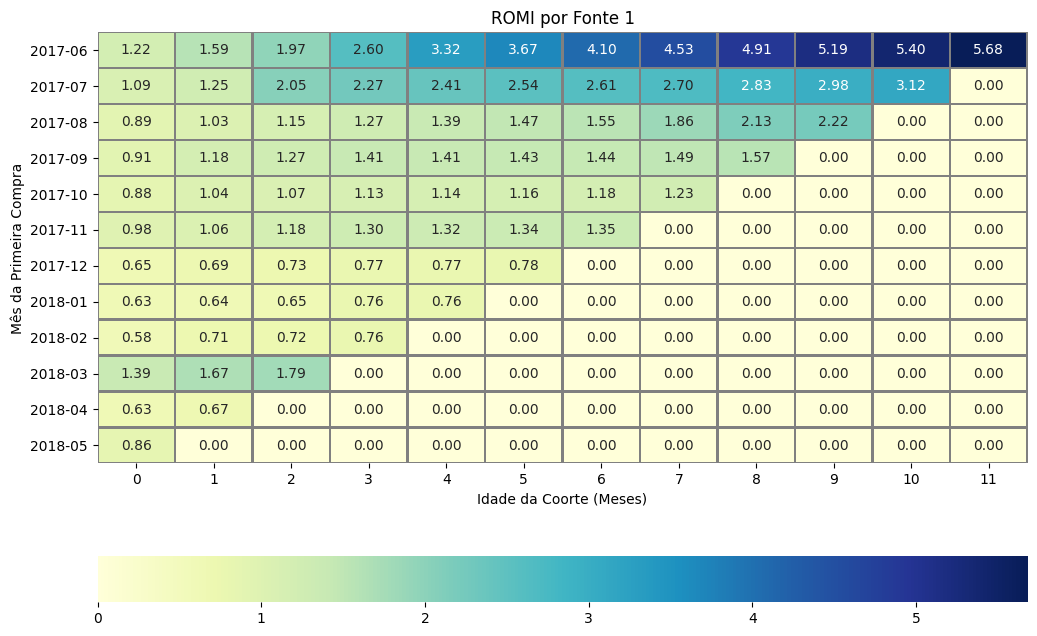

ROMI calculado e visualizado para a fonte 1.


Calculando ROMI para a fonte 2...
Tamanho da coorte calculado:
   source_id first_order_month  n_buyers
0          2           2017-06       235
1          2           2017-07       208
2          2           2017-08       123
3          2           2017-09       221
4          2           2017-10       396
Receita acumulada por coorte calculada:
   source_id first_order_month order_month       gp
0          2           2017-06     2017-06  1043.68
1          2           2017-06     2017-07   115.54
2          2           2017-06     2017-08    63.90
3          2           2017-06     2017-09   452.35
4          2           2017-06     2017-10   391.70
Relatório de ROMI (antes de cálculos adicionais):
   source_id first_order_month  n_buyers order_month       gp
0          2           2017-06       235     2017-06  1043.68
1          2           2017-06       235     2017-07   115.54
2          2           2017-06       235     2017-08    

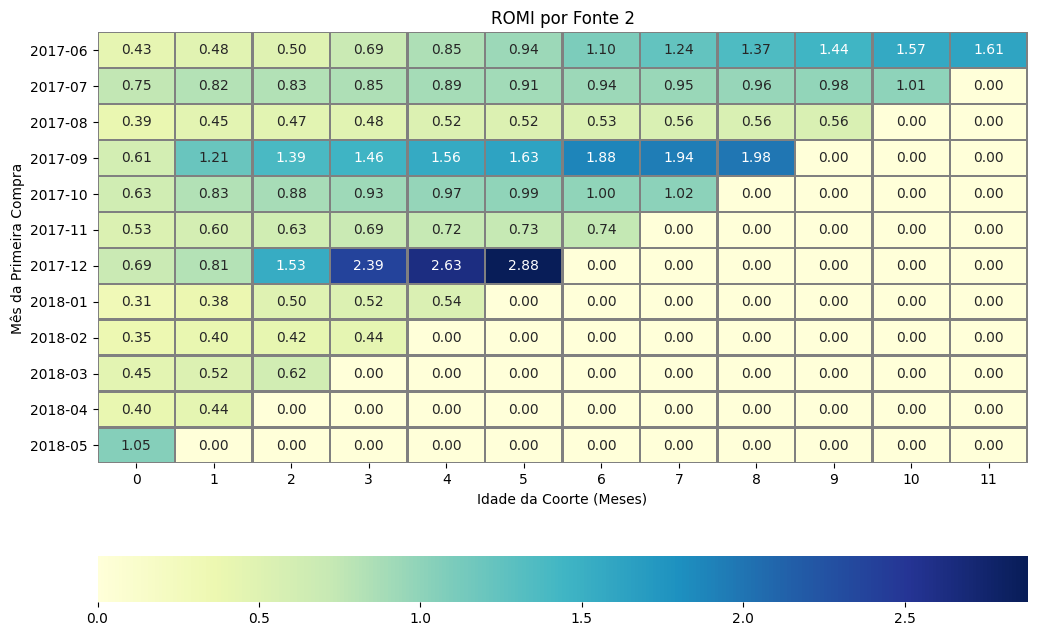

ROMI calculado e visualizado para a fonte 2.


Calculando ROMI para a fonte 3...
Tamanho da coorte calculado:
   source_id first_order_month  n_buyers
0          3           2017-06       638
1          3           2017-07       512
2          3           2017-08       337
3          3           2017-09       781
4          3           2017-10      1152
Receita acumulada por coorte calculada:
   source_id first_order_month order_month       gp
0          3           2017-06     2017-06  2804.34
1          3           2017-06     2017-07    71.97
2          3           2017-06     2017-08   118.93
3          3           2017-06     2017-09   198.55
4          3           2017-06     2017-10   118.48
Relatório de ROMI (antes de cálculos adicionais):
   source_id first_order_month  n_buyers order_month       gp
0          3           2017-06       638     2017-06  2804.34
1          3           2017-06       638     2017-07    71.97
2          3           2017-06       638     2017-08   1

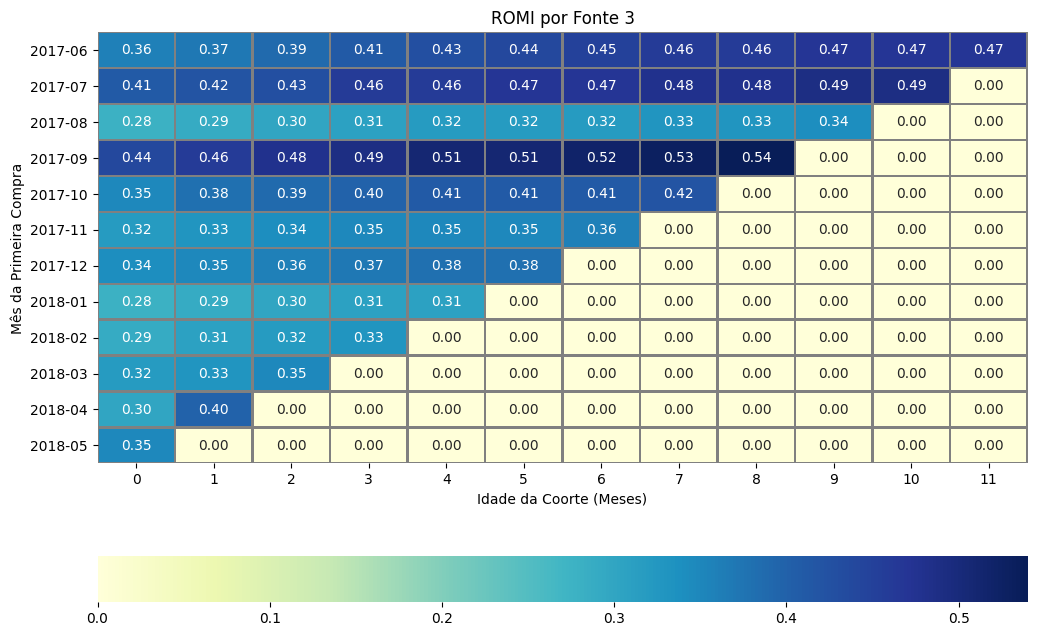

ROMI calculado e visualizado para a fonte 3.


Calculando ROMI para a fonte 4...
Tamanho da coorte calculado:
   source_id first_order_month  n_buyers
0          4           2017-06       413
1          4           2017-07       517
2          4           2017-08       338
3          4           2017-09       590
4          4           2017-10      1172
Receita acumulada por coorte calculada:
   source_id first_order_month order_month       gp
0          4           2017-06     2017-06  1959.84
1          4           2017-06     2017-07    16.66
2          4           2017-06     2017-08    70.57
3          4           2017-06     2017-09   189.74
4          4           2017-06     2017-10   474.30
Relatório de ROMI (antes de cálculos adicionais):
   source_id first_order_month  n_buyers order_month       gp
0          4           2017-06       413     2017-06  1959.84
1          4           2017-06       413     2017-07    16.66
2          4           2017-06       413     2017-08    

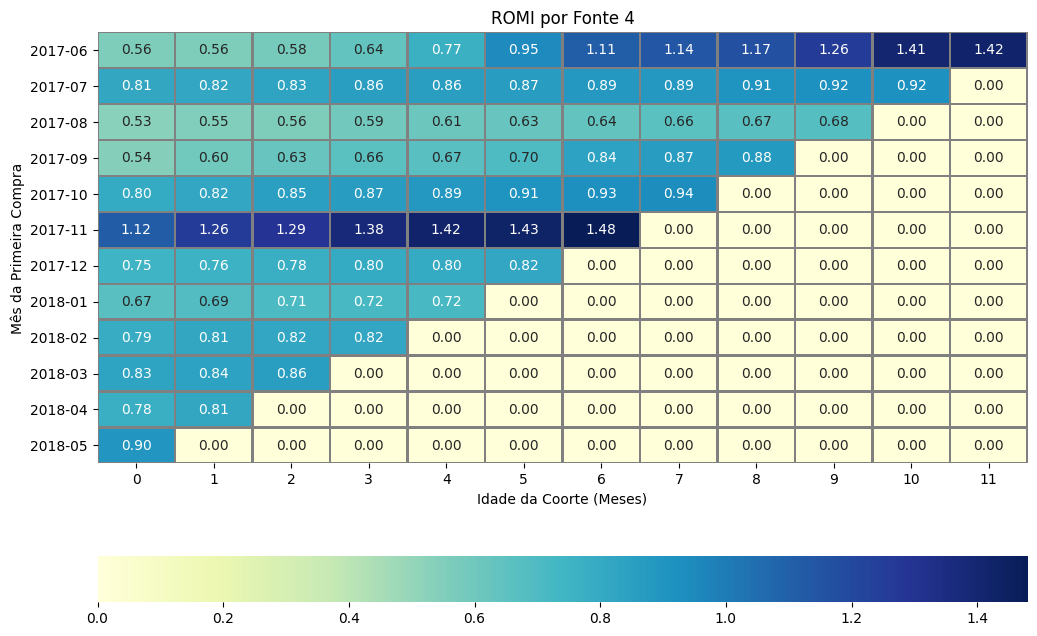

ROMI calculado e visualizado para a fonte 4.


Calculando ROMI para a fonte 5...
Tamanho da coorte calculado:
   source_id first_order_month  n_buyers
0          5           2017-06       384
1          5           2017-07       423
2          5           2017-08       360
3          5           2017-09       589
4          5           2017-10       945
Receita acumulada por coorte calculada:
   source_id first_order_month order_month       gp
0          5           2017-06     2017-06  1898.89
1          5           2017-06     2017-07   346.73
2          5           2017-06     2017-08   172.53
3          5           2017-06     2017-09   335.13
4          5           2017-06     2017-10   254.71
Relatório de ROMI (antes de cálculos adicionais):
   source_id first_order_month  n_buyers order_month       gp
0          5           2017-06       384     2017-06  1898.89
1          5           2017-06       384     2017-07   346.73
2          5           2017-06       384     2017-08   1

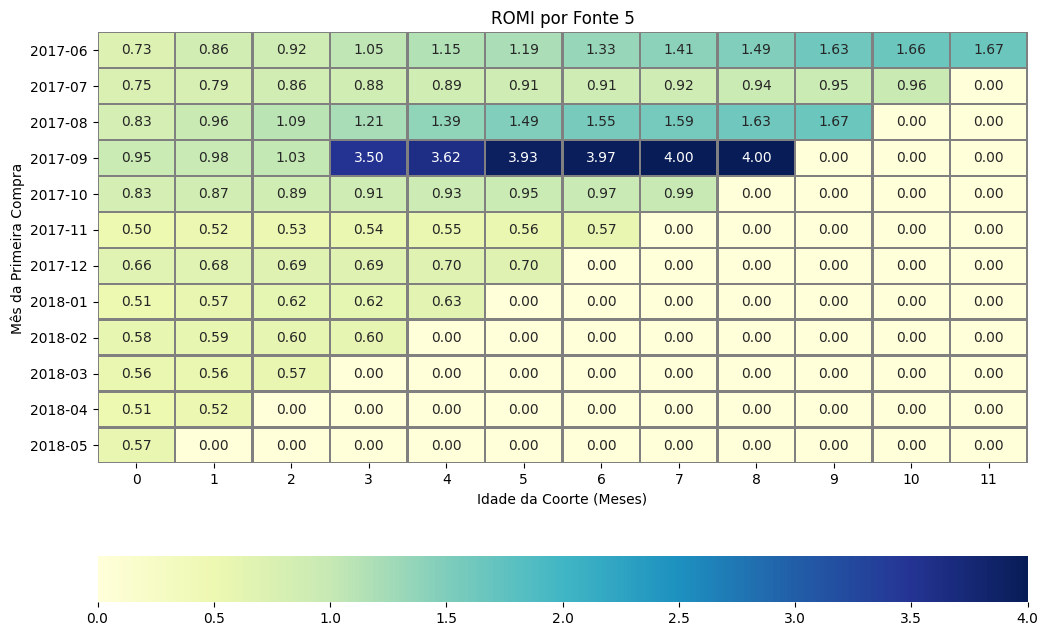

ROMI calculado e visualizado para a fonte 5.


Calculando ROMI para a fonte 9...
Tamanho da coorte calculado:
   source_id first_order_month  n_buyers
0          9           2017-06        68
1          9           2017-07        52
2          9           2017-08        61
3          9           2017-09        87
4          9           2017-10       126
Receita acumulada por coorte calculada:
   source_id first_order_month order_month      gp
0          9           2017-06     2017-06  242.69
1          9           2017-06     2017-07    4.88
2          9           2017-06     2017-08   39.98
3          9           2017-06     2017-09   41.29
4          9           2017-06     2017-10   18.19
Relatório de ROMI (antes de cálculos adicionais):
   source_id first_order_month  n_buyers order_month      gp
0          9           2017-06        68     2017-06  242.69
1          9           2017-06        68     2017-07    4.88
2          9           2017-06        68     2017-08   39.98
3   

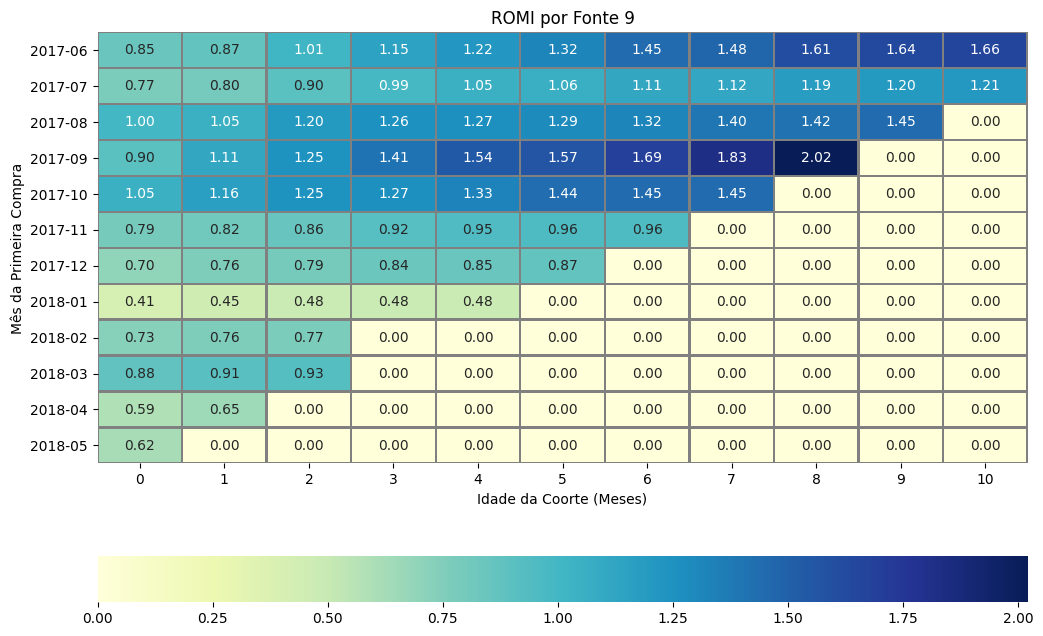

ROMI calculado e visualizado para a fonte 9.


Calculando ROMI para a fonte 10...
Tamanho da coorte calculado:
   source_id first_order_month  n_buyers
0         10           2017-06        95
1         10           2017-07        51
2         10           2017-08        37
3         10           2017-09        86
4         10           2017-10       209
Receita acumulada por coorte calculada:
   source_id first_order_month order_month      gp
0         10           2017-06     2017-06  229.35
1         10           2017-06     2017-07   11.06
2         10           2017-06     2018-02    0.85
3         10           2017-07     2017-07  176.53
4         10           2017-07     2017-08    1.59
Relatório de ROMI (antes de cálculos adicionais):
   source_id first_order_month  n_buyers order_month      gp
0         10           2017-06        95     2017-06  229.35
1         10           2017-06        95     2017-07   11.06
2         10           2017-06        95     2018-02    0.85
3  

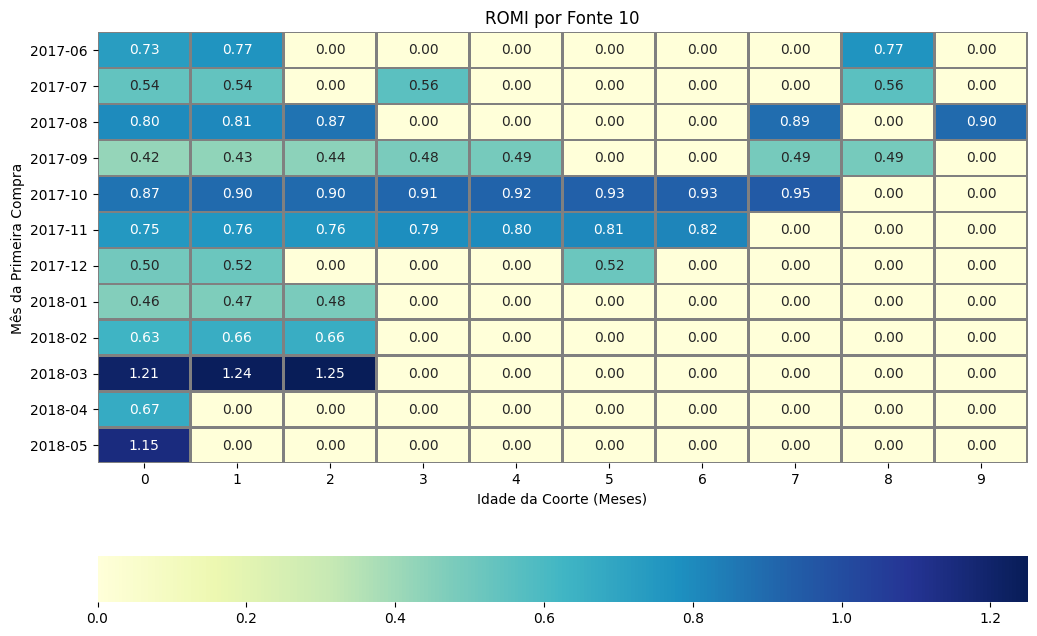

ROMI calculado e visualizado para a fonte 10.



In [21]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], errors='coerce') # Cálculo do ROMI
if orders['buy_ts'].isnull().any():
    orders['order_month'] = orders['buy_ts'].dt.to_period('M')

# Identificar a primeira compra de cada usuário
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders['first_order_month'] = first_orders['buy_ts'].dt.to_period('M')

# 1.2. Processar a tabela Visits
visits['start_ts'] = pd.to_datetime(visits['start_ts'], errors='coerce')  
if visits['start_ts'].isnull().any():
    visits['month'] = visits['start_ts'].dt.to_period('M')  

# Identificar a primeira visita de cada usuário
first_visits = visits.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visits = pd.merge(first_visits, visits, on=['uid', 'start_ts'], how='left')  # Obter 'source_id'
first_visits['first_visit_month'] = first_visits['start_ts'].dt.to_period('M')

# 1.3. Mesclar informações de primeira compra e primeira visita
print("\nMesclando 'first_orders' com 'first_visits' para criar 'buyers'...")
buyers = pd.merge(first_orders, first_visits[['uid', 'source_id', 'first_visit_month']], on='uid', how='left')

# 1.4. Agrupar as receitas por usuário e mês do pedido
#print("\nAgrupando as receitas por usuário e mês do pedido...")
month_revenue = orders.groupby(['uid', 'order_month']).agg({'revenue': 'sum'}).reset_index()
#print("Tabela 'month_revenue' criada com sucesso.")
#print(month_revenue.head())

# 1.5. Mesclar 'buyers' com 'month_revenue'
#print("\nMesclando 'buyers' com 'month_revenue'...")
# Aqui, precisamos mesclar com 'order_month' para garantir que a receita seja correta
buyers = pd.merge(buyers, month_revenue, on='uid', how='left')
#print("Tabela 'buyers' após a mescla com 'month_revenue':")
#print(buyers.head())

# 1.6. Processar a tabela Costs
#print("\nProcessando a tabela 'costs'...")
costs['dt'] = pd.to_datetime(costs['dt'], errors='coerce')  # Converter para datetime
if costs['dt'].isnull().any():
    #print("Aviso: Algumas datas em 'dt' não puderam ser convertidas e foram definidas como NaT.")

    costs['costs_month'] = costs['dt'].dt.to_period('M')  # Extrair o mês dos custos
    monthly_costs = costs.groupby(['source_id', 'costs_month']).agg({'costs': 'sum'}).reset_index()
#print("Tabela 'monthly_costs' criada com sucesso.")
#print(monthly_costs.head())

# 2. Cálculo do ROMI por Coorte

print("\nIniciando o cálculo do ROMI por coorte...")

# 2.1. Loop por cada fonte de tráfego, exceto a fonte 7
for source, df in buyers.groupby('source_id'):
    if source != 7:
        print(f"\nCalculando ROMI para a fonte {source}...")
        
        # 2.2. Calcular o tamanho da coorte (número de compradores únicos) por fonte e mês do primeiro pedido
        cohort_sizes_t = (
            df.groupby(['source_id', 'first_order_month'])
            .agg({'uid': 'nunique'})
            .reset_index()
        )
        cohort_sizes_t.columns = ['source_id', 'first_order_month', 'n_buyers']
        print("Tamanho da coorte calculado:")
        print(cohort_sizes_t.head())
        
        # 2.3. Calcular a receita acumulada por coorte, fonte e mês do pedido
        cohorts_revenue_t = (
            df.groupby(['source_id', 'first_order_month', 'order_month'])
            .agg({'revenue': 'sum'})
            .reset_index()
        )
        cohorts_revenue_t.columns = ['source_id', 'first_order_month', 'order_month', 'gp']
        print("Receita acumulada por coorte calculada:")
        print(cohorts_revenue_t.head())
        
        # 2.4. Juntar os tamanhos da coorte e as receitas acumuladas
        report_romi = pd.merge(cohort_sizes_t, cohorts_revenue_t, on=['source_id', 'first_order_month'], how='left')
        print("Relatório de ROMI (antes de cálculos adicionais):")
        print(report_romi.head())
        
        # 2.5. Calcular a idade da coorte em meses
        # A diferença entre 'order_month' e 'first_order_month' já é em períodos mensais, então 'x.n' retorna a diferença em meses
        report_romi['age'] = (report_romi['order_month'] - report_romi['first_order_month']).apply(lambda x: x.n)
        report_romi['age'] = report_romi['age'].astype(int)
        print("Idade da coorte calculada:")
        print(report_romi[['source_id', 'first_order_month', 'order_month', 'age']].head())
        
        # 2.6. Calcular o LTV (Lifetime Value) por coorte
        report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']
        print("LTV calculado:")
        print(report_romi[['gp', 'n_buyers', 'ltv']].head())
        
        # 2.7. Juntar os custos mensais por fonte de tráfego e mês do primeiro pedido
        report_romi = pd.merge(
            report_romi,
            monthly_costs,
            left_on=['source_id', 'first_order_month'],
            right_on=['source_id', 'costs_month'],
            how='left'
        )
        print("Custos mesclados:")
        print(report_romi.head())
        
        # 2.8. Remover a coluna de mês de custos após a junção
        report_romi = report_romi.drop(['costs_month'], axis=1)
        print("Coluna 'costs_month' removida.")
        
        # 2.9. Preencher NaNs nos custos com 0
        report_romi['costs'] = report_romi['costs'].fillna(0)
        print("NaNs nos custos preenchidos com 0.")
        
        # 2.10. Calcular o CAC (Customer Acquisition Cost) por coorte
        report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
        print("CAC calculado:")
        print(report_romi[['costs', 'n_buyers', 'cac']].head())
        
        # 2.11. Calcular o ROMI (Return on Marketing Investment) por coorte
        # Evita divisão por zero substituindo 'cac' igual a 0 por NaN
        report_romi['romi'] = report_romi['ltv'] / report_romi['cac'].replace(0, np.nan)
        print("ROMI calculado:")
        print(report_romi[['ltv', 'cac', 'romi']].head())
        
        # 2.12. Calcular o ROMI acumulado por idade da coorte
        romi = report_romi.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1)
        romi = romi.round(2).fillna(0)  # Preencher NaNs com 0 para evitar erros no heatmap
        print("Tabela de ROMI acumulado:")
        print(romi.head())
        
        # 2.13. Ajustar o tipo do índice para string e criar um mapa de calor com seaborn
        romi.index = romi.index.astype(str)
        plt.figure(figsize=(12, 8))
        sns.heatmap(
            romi,
            annot=True,
            fmt='.2f',
            linewidths=1,
            linecolor='grey',
            cbar_kws={'orientation': 'horizontal'},
            cmap='YlGnBu'
        )
        plt.title(f'ROMI por Fonte {source}')
        plt.xlabel('Idade da Coorte (Meses)')
        plt.ylabel('Mês da Primeira Compra')
        plt.show()
        
        print(f"ROMI calculado e visualizado para a fonte {source}.\n")

<div class="alert alert-info">
<strong>Comentário do revisor v6</strong>

Não desanime Perola, está indo super bem!
    
Seu código estava quase perfeito, mas tinham 2-3 linhas que por estarem dentro de ifs não estavam rodando e eram fundamentais. Consegui ajustar mas mantive também o seu código para que você possa comparar.
    
Me fale se conseguiu entender e pode seguir com as conclusões.
</div>



# 1.7 Conclusão

As fontes de marketing com IDs 1 e 2 apresentaram um retorno muito alto, indicando que o investimento nelas foi extremamente eficiente e trouxe resultados significativos. Em contraste, a fonte com ID 3 obteve o menor ROI, o que, apesar de ser lucrativo, representa um retorno sobre o investimento bem menor em comparação aos outros canais.

Para aquisição de clientes, os IDs 1 e 9 mostraram os menores CACs, destacando um custo reduzido para cada novo cliente, o que reflete uma eficiência elevada nos gastos de marketing. Por outro lado, o ID 3 apresentou o maior CAC, tornando-se o canal menos eficiente em relação ao custo de aquisição de clientes. Esse dado sugere que os gastos nesse canal são elevados para cada cliente conquistado, indicando a necessidade de ajustes.

Observa-se também uma variação expressiva nos valores investidos em cada canal, com alguns recebendo investimentos mais substanciais do que outros, o que aponta para a adoção de estratégias de marketing diferenciadas para cada ID.